# 2019 Ford Go-Bike Project
## by Ima Jackson



## Investigation Overview


The investigation on this dataset focuses on popular start and end stations of trips, trip duration patterns, trip weekly and hourly pattern, user_type and gender and the relationships that exist between them.




## Dataset Overview

There are 183,412 bike trips in this dataset with 16 features. Each row contains information on individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

bike_df = pd.read_csv('fordgobike-tripdata.csv')

## Univariate Exploration


### Trip Distribution by Weekday
 

In [3]:
# Convert start time to datetime

bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])

In [4]:
# Extract weekday and hour from start time

bike_df['day_of_week'] = bike_df['start_time'].dt.weekday_name
bike_df['hour'] = bike_df['start_time'].dt.hour

Thursday had the highest trips from the visual display. More trips were taken on weekdays than weekends.

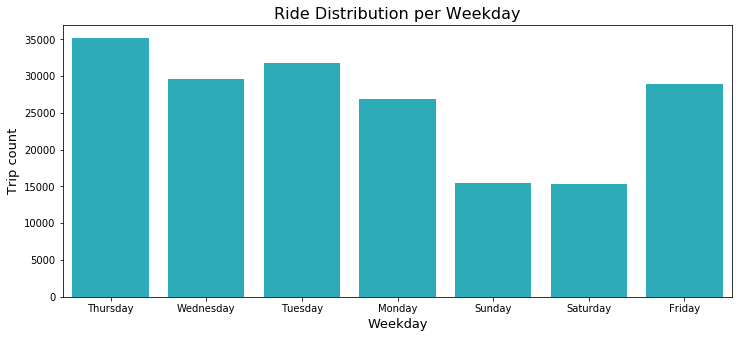

In [5]:
# Plot trips by weekday

plt.figure(figsize=(12,5))
base_color = sb.color_palette()[9]
sb.countplot(data=bike_df, x='day_of_week', color=base_color)
plt.xlabel('Weekday', fontsize=13)
plt.ylabel('Trip count', fontsize=13)
plt.title('Ride Distribution per Weekday', fontsize=16);

### Ride Distribution by Hour

The hour of the day with the highest record of trips is 5pm. Trips are more frequent between 7am -9am in the mornings, and 4pm - 6pm in the evenings, with a reduction of trips from 7pm - 7am in the morning.

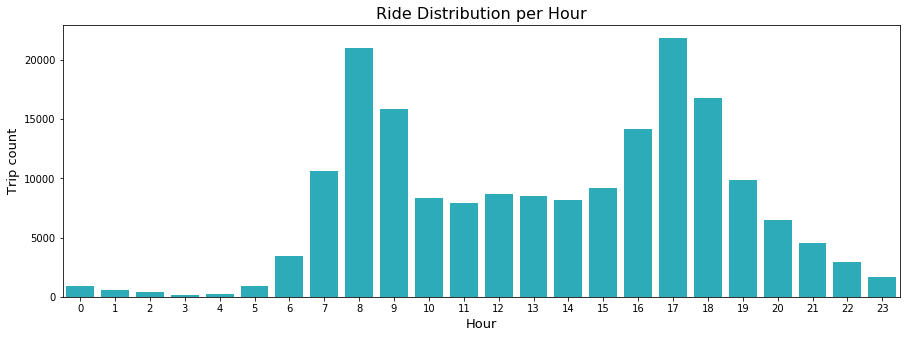

In [6]:
# Plot trips by hour

plt.figure(figsize=(15,5))
base_color = sb.color_palette()[9]
sb.countplot(data=bike_df, x='hour', color=base_color)
plt.xlabel('Hour', fontsize=13)
plt.ylabel('Trip count', fontsize=13)
plt.title('Ride Distribution per Hour', fontsize=16);

## Bivariate Exploration

### User Distribution of Trips by Weekday

There were more subscribers than customer users. Subscribera and customers had the highest trips recorded on Thurday, with the least trips recorded weekend.

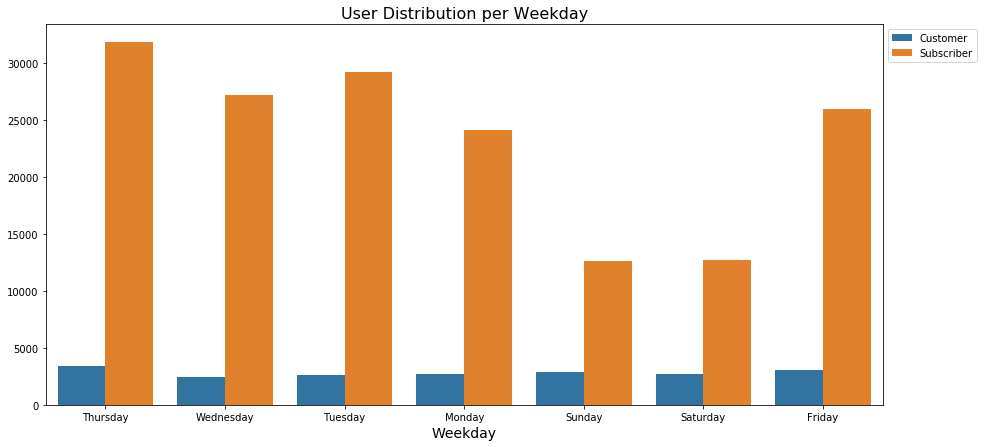

In [7]:
# Plot chart to show usage by weekday

plt.figure(figsize=(15,7))

bike_data = sb.countplot(data=bike_df, x='day_of_week',  hue='user_type')
plt.xlabel('Weekday', fontsize=14)
plt.title('User Distribution per Weekday', fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
bike_data.set(ylabel='');

### Trip Duration Distribution of Users

Customers had higher trip duration time than subscribers, even though subscribers had more recorded trips..

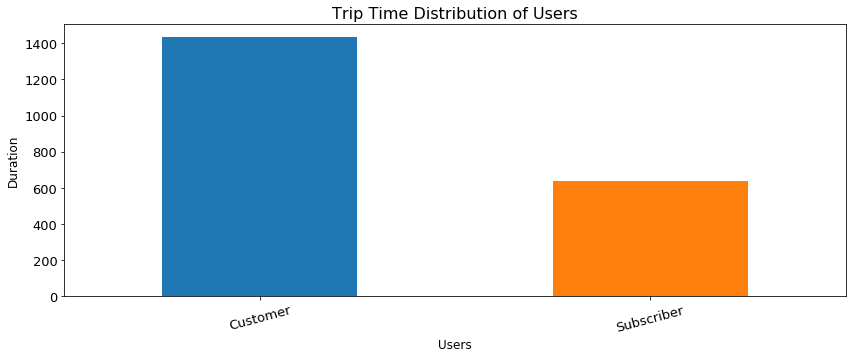

In [8]:
# Pkot trip duration distribution of users

plt.figure(figsize=(10,6))

base_color = sb.color_palette()[1]
gender_trips = bike_df.groupby(['user_type']).mean()['duration_sec']
gender_trips.plot(kind='bar', figsize=(14,5), fontsize=13)
plt.title('Trip Time Distribution of Users',fontsize=16)
plt.xlabel('Users',fontsize=12)
plt.ylabel('Duration',fontsize=12)
plt.xticks(rotation=15);

## Multivariate Exploration

### Trip Duration Distribution by Gender Usage



Male gender had the least trip time for both subscribers and users, though they had the highest record of trips.

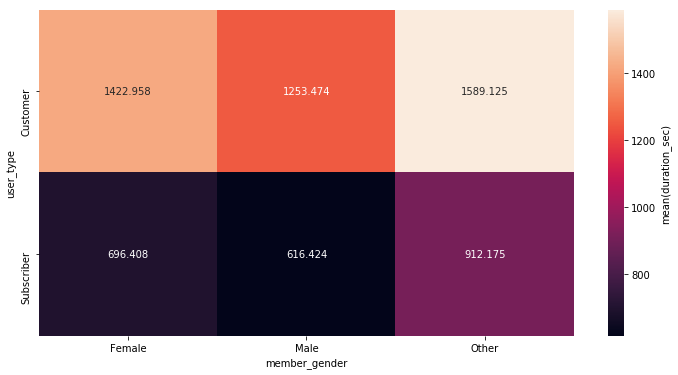

In [9]:
# Visual display of heatmap to show trip duration by users and gender

plt.figure(figsize=(12,6))

duration_means = bike_df.groupby(['member_gender', 'user_type']).mean()['duration_sec']
duration_means = duration_means.reset_index(name = 'duration_sec_avg')
duration_means = duration_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'duration_sec_avg')
sb.heatmap(duration_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_sec)'});

### Weekly Trip Duration of Users

Customers had the highest trip duration with the most recorded over the weekend. It is observed that the subscribers go on shorter trips, and ride most during the week, while the customers go on trips mostly weekends.

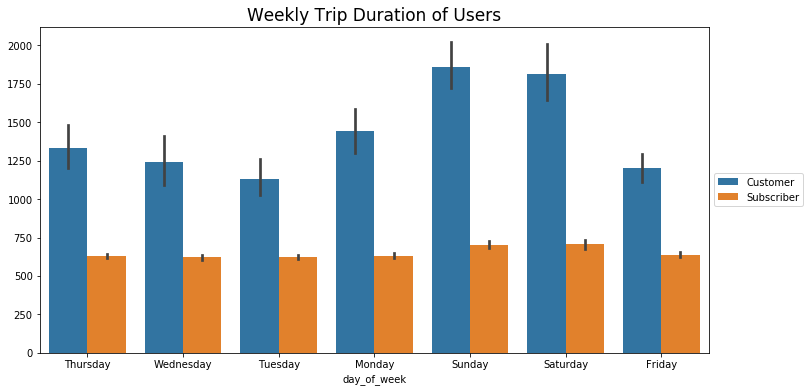

In [10]:
# Barplot to display weekly trip duration of users

plt.figure(figsize=(12,6))
plt.title('Weekly Trip Duration of Users', fontsize=17)
bikes = sb.barplot(data=bike_df, x='day_of_week', y='duration_sec', hue='user_type')

plt.legend(loc='center left', bbox_to_anchor=(1,0.5));
bikes.set(ylabel='');

In [ ]:

!jupyter nbconvert Part_II_explanatory_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_explanatory_template.ipynb to slides
[NbConvertApp] Writing 395927 bytes to Part_II_explanatory_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_explanatory_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/b